In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df['Age'].fillna(df['Age'].mean() ,inplace=True)

In [5]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [7]:
X.sample(5)

,Age,Fare
278,7.0,29.1250
850,4.0,31.2750
827,1.0,37.0042
587,60.0,79.2000
482,50.0,8.0500


In [8]:
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Text(0.5, 1.0, 'Age QQ Plot')

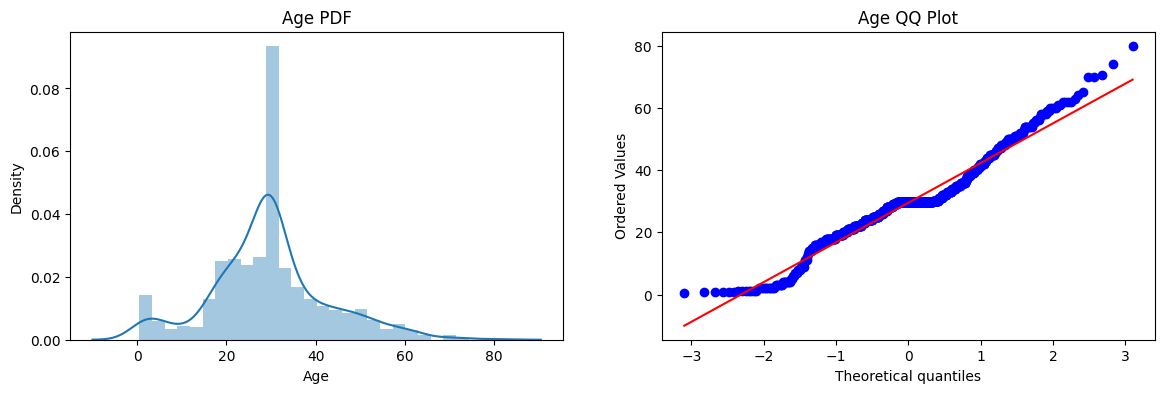

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')

Text(0.5, 1.0, 'Fare QQ Plot')

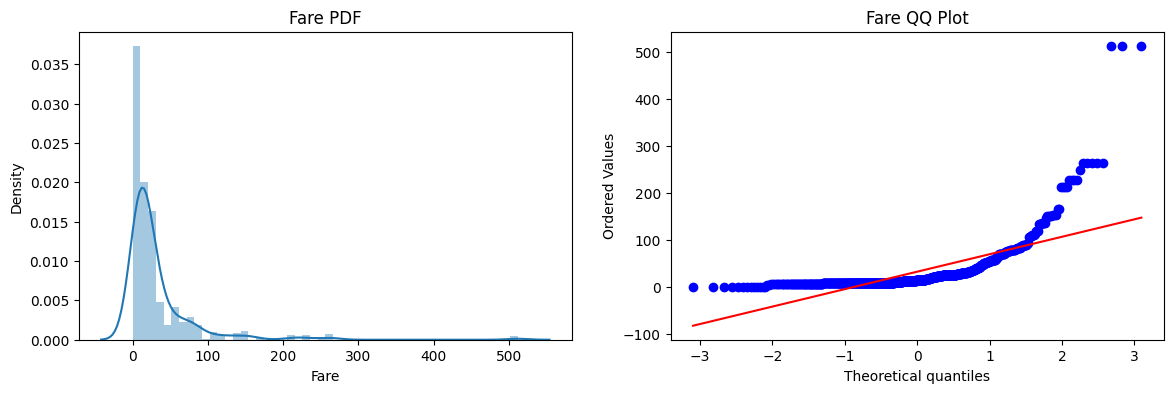

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])   # Right-Skewed Data
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ Plot')

### Model Building :

In [11]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [12]:
clf.fit(X_train , y_train)
clf2.fit(X_train , y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print(f"Accuracy of LR : {accuracy_score(y_test,y_pred) :.5f}")
print(f"Accuracy of DT : {accuracy_score(y_test,y_pred2) :.5f}")

Accuracy of LR : 0.64804
Accuracy of DT : 0.65363


### Log Transformation :

In [13]:
trf = FunctionTransformer(func= np.log1p)

In [14]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [15]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [16]:
y_pred = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

In [17]:
print(f"Accuracy of LR : {accuracy_score(y_test,y_pred) :.5f}")
print(f"Accuracy of DT : {accuracy_score(y_test,y_pred2) :.5f}")

Accuracy of LR : 0.68156
Accuracy of DT : 0.65922


### Cross Validation :

In [18]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [19]:
print(f"LR : {np.mean( cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10) ):.5f}")
print(f"DT : {np.mean( cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10) ):.5f}")

LR : 0.67803
DT : 0.65548


Text(0.5, 1.0, 'Fare After Log')

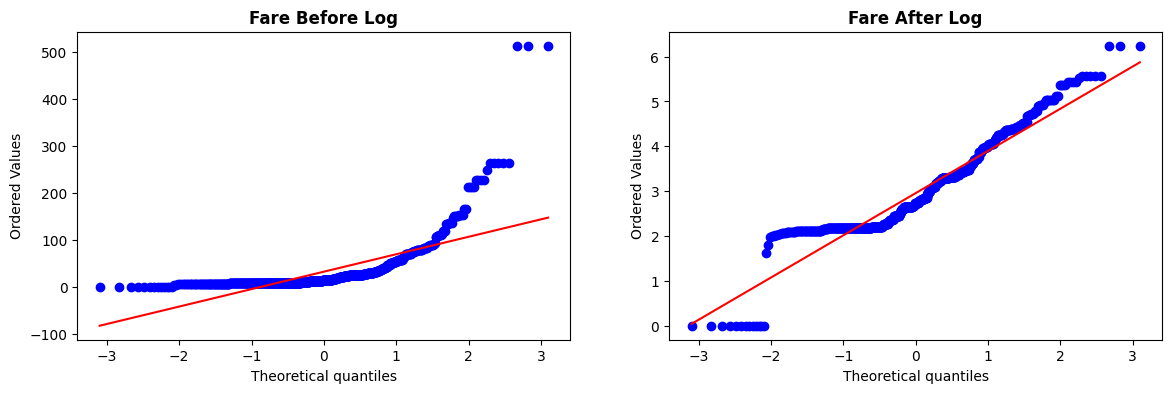

In [20]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'] ,dist='norm',plot=plt)
plt.title("Fare Before Log",fontweight='bold')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'] ,dist='norm',plot=plt)  # Improvement in 'Fare'
plt.title("Fare After Log",fontweight='bold')

Text(0.5, 1.0, 'Age After Log')

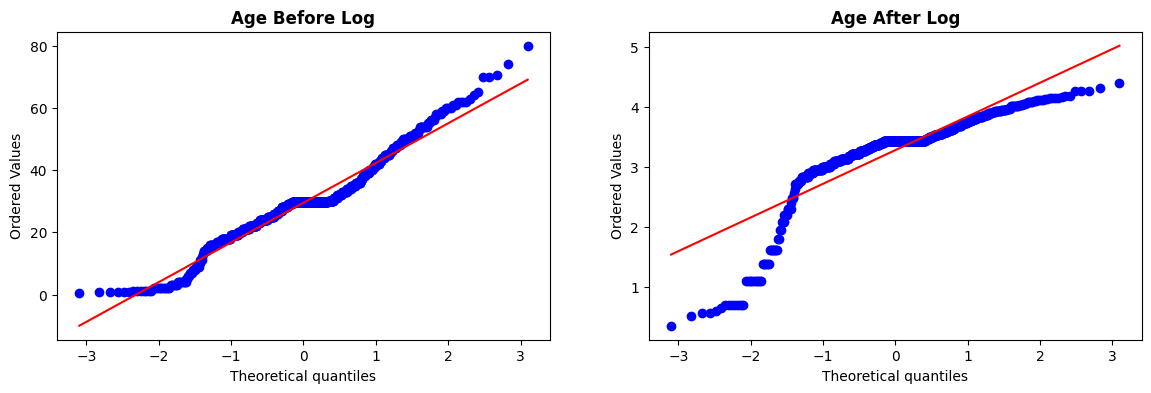

In [21]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'] ,dist='norm',plot=plt)
plt.title("Age Before Log",fontweight='bold')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'] ,dist='norm',plot=plt) # No improvement in 'Age'
plt.title("Age After Log",fontweight='bold')

### Using Column Transformer :

In [22]:
trf2 = ColumnTransformer([
                    ('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [23]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2 , y_train)
clf2.fit(X_train_transformed2 , y_train)

DecisionTreeClassifier()

In [24]:
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print(f"Accuracy of LR : {accuracy_score(y_test,y_pred) :.5f}")
print(f"Accuracy of DT : {accuracy_score(y_test,y_pred2) :.5f}")

Accuracy of LR : 0.67039
Accuracy of DT : 0.66480


#### NOTE :-
`Function Transformation` is beneficial in case of Linear/Logistic Regression. It is not much useful in Decision Tree.

In [25]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [27]:
print(f"LR : {np.mean( cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10) ):.5f}")
print(f"DT : {np.mean( cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10) ):.5f}")

LR : 0.67126
DT : 0.66444


### Other Transformations :

In [35]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',
                              FunctionTransformer(transform),
                              ['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    clf = LogisticRegression()
    print(f"Accuracy : {np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)):.5f}")

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'],dist='norm',plot=plt)
    plt.title('Fare Before Transform',fontweight='bold')

    plt.subplot(122)
    stats.probplot(X_trans[:,0],dist='norm',plot=plt)
    plt.title('Fare After Transform',fontweight='bold')

    plt.show()

Accuracy : 0.64313


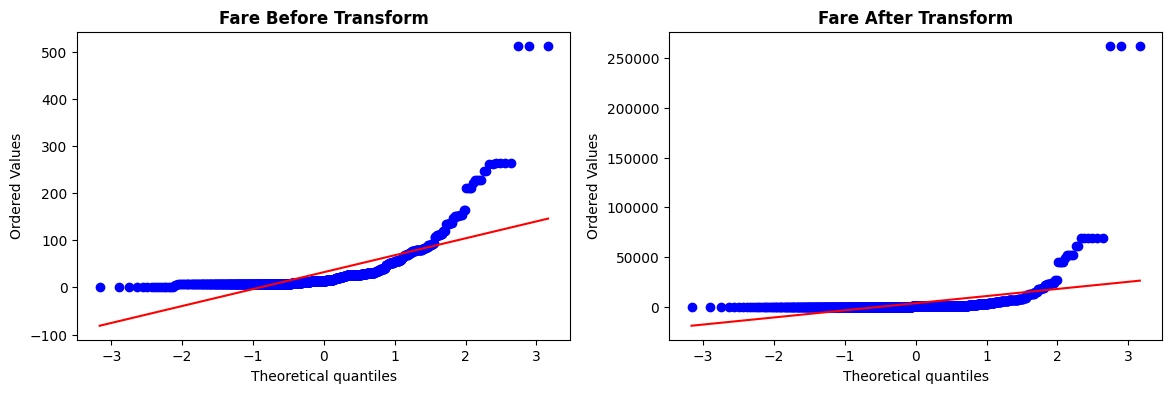

In [36]:
apply_transform(lambda x : x**2)  # Square Transformation

Accuracy : 0.65890


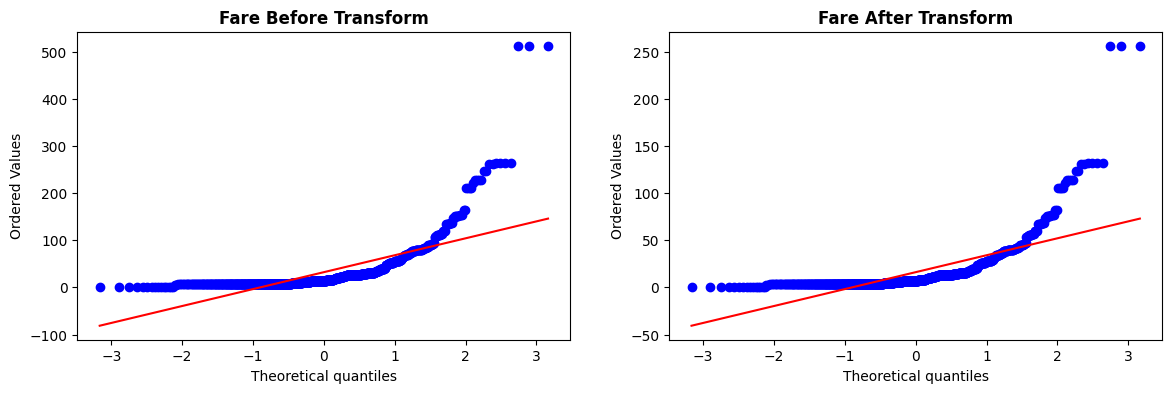

In [37]:
apply_transform(lambda x : x**1/2)  # Square Root Transformation

Accuracy : 0.61729


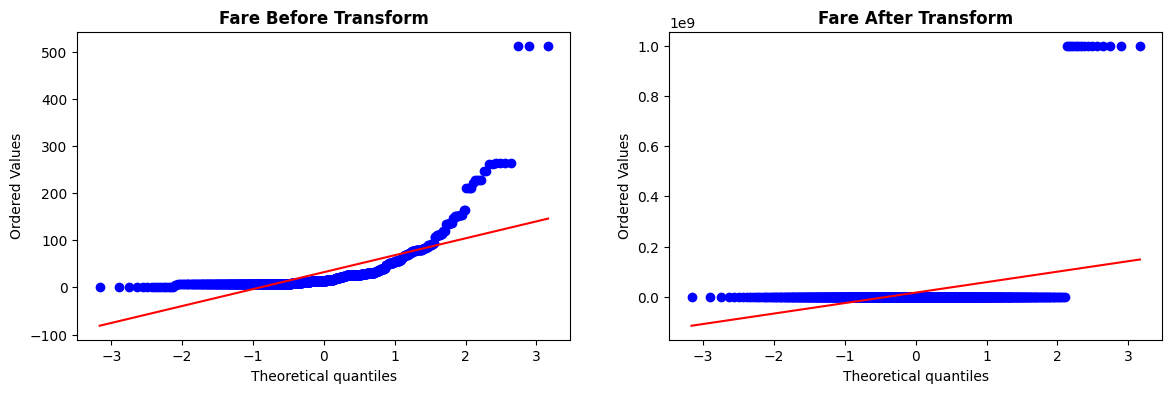

In [39]:
apply_transform(lambda x : 1/(x+0.000000001))   # Reciprocal Transformation